In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
mushroom= pd.read_csv("C:\\Users\\hp\\Desktop\\EXCELR\\EXCELR\\SVM\\mushroom.csv")
mushroom.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


### 1. EDA

In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

##### Drop unnamed column

In [7]:
mushroom.drop('Unnamed: 0', axis=1, inplace= True)
mushroom

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [9]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

#### 2. Data preprocessing

In [11]:
unique_counts = mushroom.nunique()
print(unique_counts)

cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64


##### Encode categorical variables

In [13]:
label_encoder = LabelEncoder()

In [15]:
categorical_cols = mushroom.iloc[:,0:23]

In [17]:
for col in categorical_cols:
    mushroom[col] = label_encoder.fit_transform(mushroom[col])

In [19]:
mushroom

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [21]:
mushroom.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,0.480000,...,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,8.449118,12.314345
std,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,0.499725,...,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,3.697217,7.048845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,0.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,5.291009,5.723521
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,0.000000,...,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,8.318596,12.124902
75%,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,1.000000,...,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.781272,18.698605
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,1.000000,...,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


##### Boxplot

<Axes: >

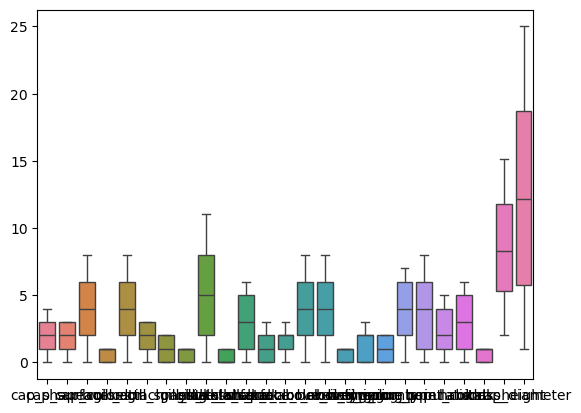

In [23]:
sns.boxplot(mushroom)

##### Correlation matrix

In [25]:
corr = np.round(mushroom.corr(),3)
corr

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
cap_shape,1.000,-0.003,0.010,-0.001,-0.030,0.015,-0.049,0.040,0.032,0.012,...,-0.039,-0.017,0.037,0.010,0.025,0.004,0.028,0.001,0.025,0.038
cap_surface,-0.003,1.000,0.003,-0.021,-0.022,-0.011,0.069,-0.038,0.046,-0.024,...,-0.069,0.040,0.006,0.018,-0.042,-0.004,-0.039,-0.046,0.043,0.017
cap_color,0.010,0.003,1.000,0.016,-0.065,0.024,-0.016,0.010,-0.006,-0.020,...,-0.020,-0.036,0.056,0.022,0.082,-0.028,-0.026,-0.078,0.044,-0.000
bruises,-0.001,-0.021,0.016,1.000,0.026,0.009,-0.004,0.042,-0.035,0.008,...,0.017,-0.054,-0.023,-0.029,-0.026,0.013,0.013,-0.015,0.065,-0.047
odor,-0.030,-0.022,-0.065,0.026,1.000,-0.055,-0.003,-0.027,-0.052,0.009,...,0.028,0.015,-0.069,0.034,-0.058,-0.012,-0.051,0.040,0.011,-0.052
gill_attachment,0.015,-0.011,0.024,0.009,-0.055,1.000,-0.064,0.009,0.035,-0.019,...,-0.043,-0.024,0.080,-0.006,0.039,-0.003,0.006,-0.028,-0.017,-0.040
gill_spacing,-0.049,0.069,-0.016,-0.004,-0.003,-0.064,1.000,-0.023,-0.011,0.051,...,-0.017,0.005,0.025,0.002,0.016,-0.005,0.004,0.047,0.016,0.029
gill_size,0.040,-0.038,0.010,0.042,-0.027,0.009,-0.023,1.000,-0.055,-0.047,...,-0.029,-0.017,-0.005,-0.029,0.039,0.019,-0.004,0.020,-0.003,-0.069
gill_color,0.032,0.046,-0.006,-0.035,-0.052,0.035,-0.011,-0.055,1.000,-0.056,...,-0.029,-0.026,-0.029,0.059,0.038,0.035,0.019,-0.028,0.026,0.004
stalk_shape,0.012,-0.024,-0.020,0.008,0.009,-0.019,0.051,-0.047,-0.056,1.000,...,0.004,-0.051,0.015,0.012,0.027,-0.000,-0.055,0.024,0.037,-0.005


#### 3. Data visualization

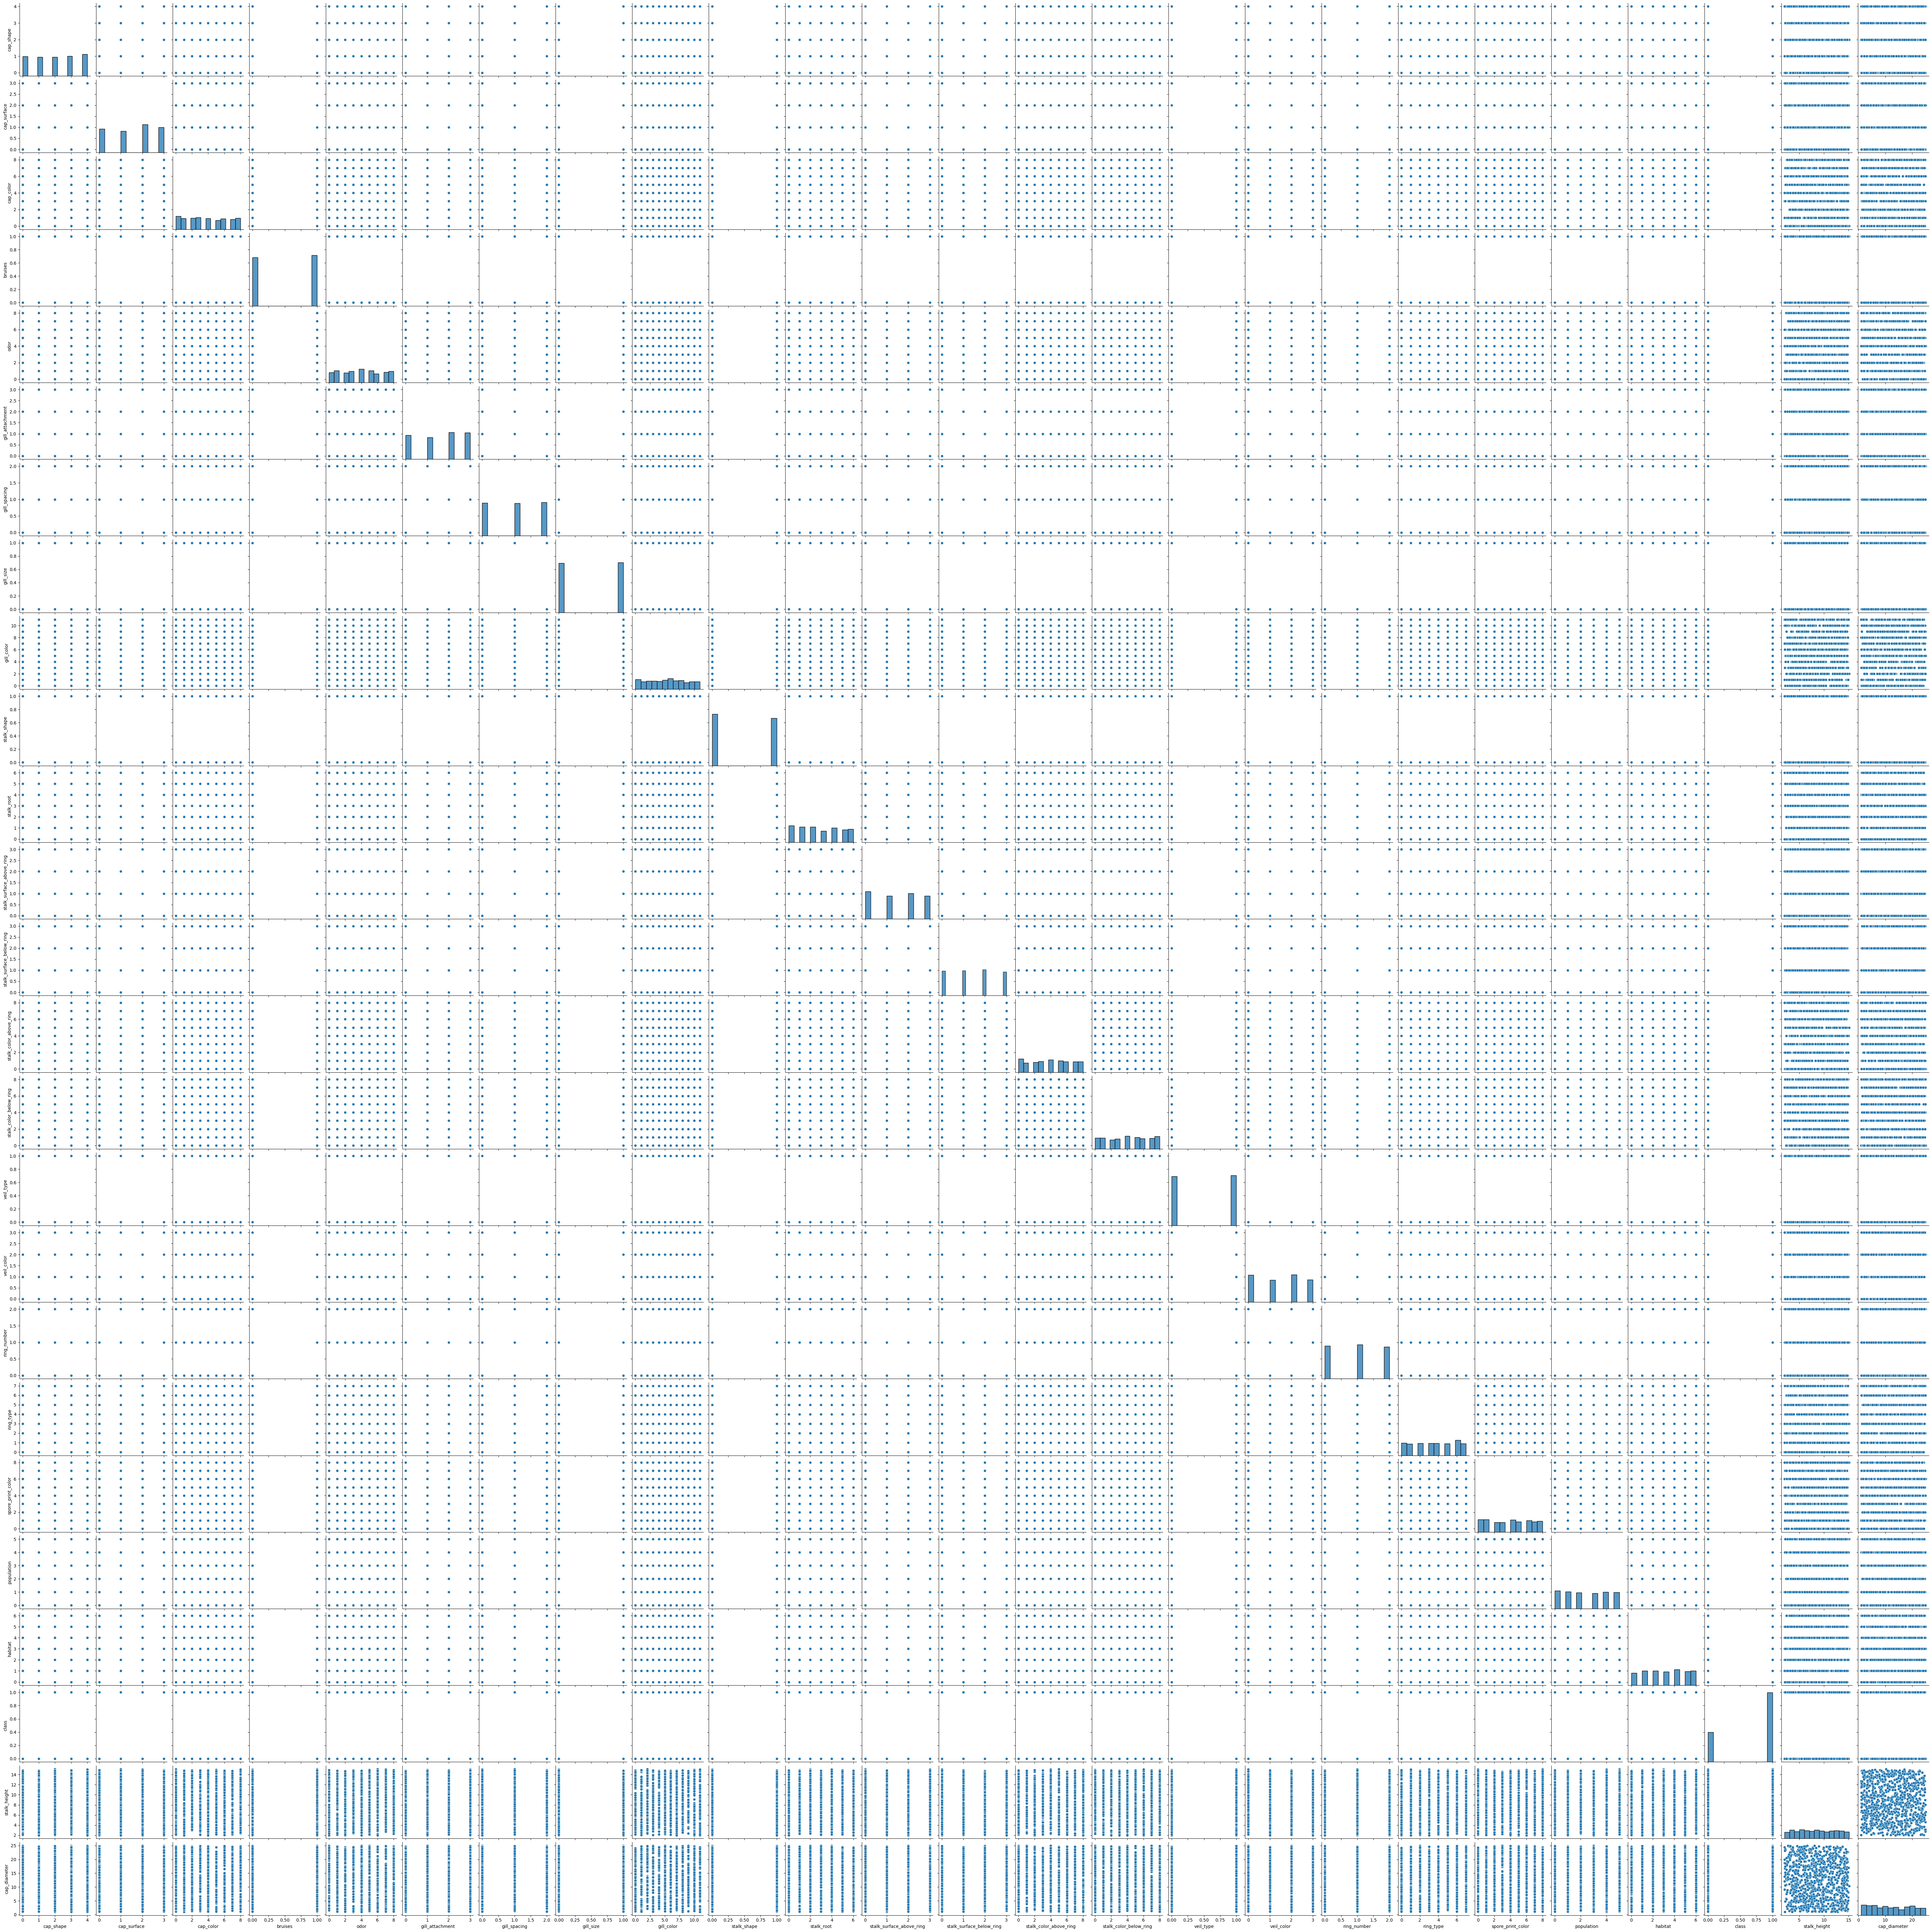

In [27]:
sns.pairplot(mushroom)

In [29]:
X = mushroom.drop('class', axis=1)
Y = mushroom['class'] 

##### Check class is balance or not

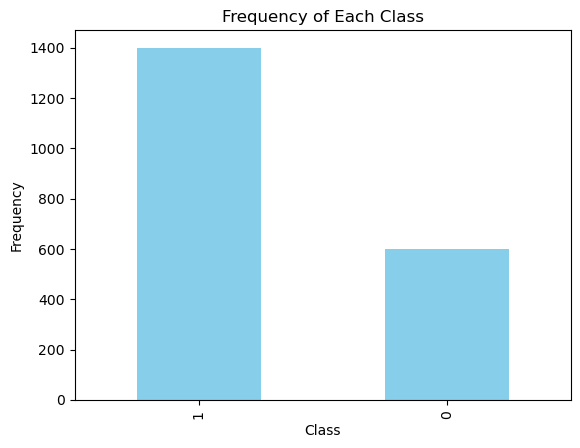

In [31]:
Y.value_counts().plot(kind='bar', color='skyblue')

plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Show plot
plt.show()

##### Balace the dataset

In [33]:
smote = SMOTE(random_state= 7)
# Fit and transform the training data
X1, Y1 = smote.fit_resample(X, Y)

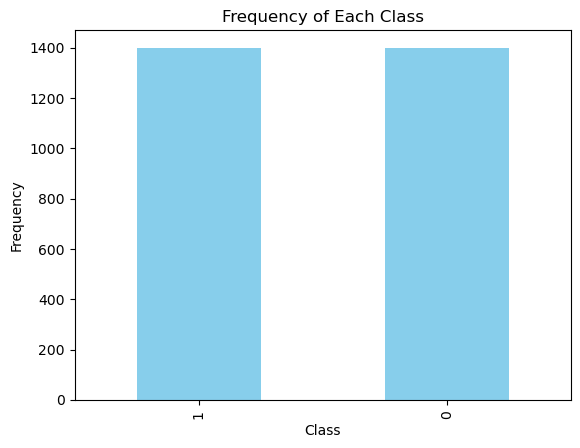

In [35]:
Y1.value_counts().plot(kind='bar', color='skyblue')

plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Show plot
plt.show()

##### Split data into train-test

In [37]:
x_train, x_test,y_train,y_test = train_test_split(X1, Y1, test_size=0.3,random_state=10)

In [39]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(1960, 24) (1960,) (840, 24) (840,)


In [41]:
y_train.value_counts()

class
0    983
1    977
Name: count, dtype: int64

#### 4. Basic SVM Implementation

In [43]:
model = SVC(kernel='linear', random_state= 20)
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=20)

In [45]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [47]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       983
           1       0.63      0.68      0.66       977

    accuracy                           0.65      1960
   macro avg       0.65      0.65      0.65      1960
weighted avg       0.65      0.65      0.65      1960



In [49]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       417
           1       0.61      0.67      0.64       423

    accuracy                           0.62       840
   macro avg       0.62      0.62      0.62       840
weighted avg       0.62      0.62      0.62       840



#### 5. Visualization of SVM results

##### Confusion matrix

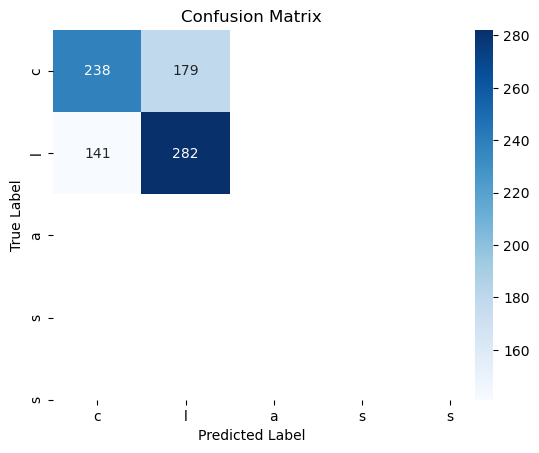

In [51]:
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels='class', yticklabels='class')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### ROC curve

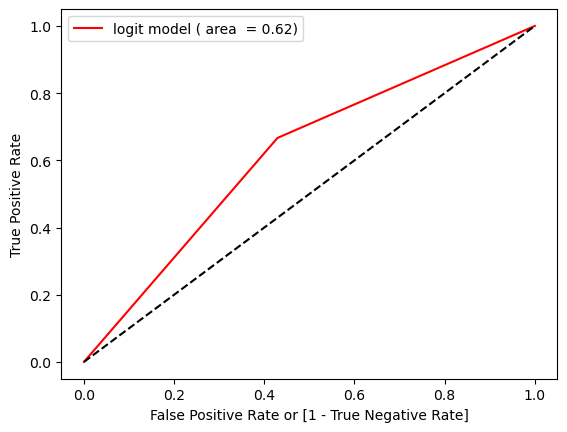

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

auc =np.round( roc_auc_score(y_test, y_pred_test),2)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label=f'logit model ( area  = {auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### 6. Hyperparameter tuning and optimization

In [55]:
# Define the expanded parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf','sigmoid'],  # Type of kernel
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly'
}

In [57]:
svm = SVC()
random_search = RandomizedSearchCV(svm, param_grid, cv=3,verbose=300, n_iter= 50, scoring= 'accuracy', n_jobs= -1, random_state= 7)
random_search.fit(x_train,y_train) 

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=7, scoring='accuracy', verbose=300)

In [59]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best Score: 0.9275624304355495


In [61]:
best_svm= SVC(kernel= 'rbf', gamma= 0.1, C= 10, random_state= 20)
best_svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1, random_state=20)

In [63]:
y_pred_train_best= best_svm.predict(x_train)
y_pred_test_best= best_svm.predict(x_test)

In [65]:
print(classification_report(y_train,y_pred_train_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       977

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



In [67]:
print(classification_report(y_test,y_pred_test_best))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       417
           1       0.93      1.00      0.96       423

    accuracy                           0.96       840
   macro avg       0.97      0.96      0.96       840
weighted avg       0.97      0.96      0.96       840



#### 7. Comparision and analysis

##### SVM with kernel linnear

In [69]:
model2= SVC(kernel= 'linear', gamma= 0.1, C= 10, random_state= 20)
model2.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', random_state=20)

In [71]:
y_pred_train_linear= model2.predict(x_train)
y_pred_test_linear= model2.predict(x_test)

In [73]:
print(classification_report(y_train,y_pred_train_linear))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       983
           1       0.63      0.68      0.66       977

    accuracy                           0.65      1960
   macro avg       0.65      0.65      0.64      1960
weighted avg       0.65      0.65      0.64      1960



In [75]:
print(classification_report(y_test,y_pred_test_linear))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       417
           1       0.61      0.66      0.63       423

    accuracy                           0.62       840
   macro avg       0.62      0.62      0.61       840
weighted avg       0.62      0.62      0.61       840



##### SVM with kernel polynomial

In [77]:
model3= SVC(kernel= 'poly', gamma= 0.1, C= 10, random_state= 20)
model3.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='poly', random_state=20)

In [79]:
y_pred_train_poly= model3.predict(x_train)
y_pred_test_poly= model3.predict(x_test)

In [81]:
print(classification_report(y_train,y_pred_train_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       977

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



In [83]:
print(classification_report(y_test,y_pred_test_poly))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       417
           1       0.92      0.87      0.89       423

    accuracy                           0.90       840
   macro avg       0.90      0.90      0.90       840
weighted avg       0.90      0.90      0.90       840



##### SVM with kernel RBF

In [85]:
model4= SVC(kernel= 'rbf', gamma= 0.1, C= 10, random_state= 20)
model4.fit(x_train, y_train)

SVC(C=10, gamma=0.1, random_state=20)

In [87]:
y_pred_train_rbf= model4.predict(x_train)
y_pred_test_rbf= model4.predict(x_test)

In [89]:
print(classification_report(y_train,y_pred_train_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       977

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



In [91]:
print(classification_report(y_test,y_pred_test_rbf))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       417
           1       0.93      1.00      0.96       423

    accuracy                           0.96       840
   macro avg       0.97      0.96      0.96       840
weighted avg       0.97      0.96      0.96       840



##### SVM with kernel sigmoid

In [93]:
model5= SVC(kernel= 'sigmoid', gamma= 0.1, C= 10, random_state= 20)
model5.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='sigmoid', random_state=20)

In [95]:
y_pred_train_sig= model5.predict(x_train)
y_pred_test_sig= model5.predict(x_test)

In [97]:
print(classification_report(y_train,y_pred_train_sig))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       983
           1       0.00      0.00      0.00       977

    accuracy                           0.50      1960
   macro avg       0.25      0.50      0.33      1960
weighted avg       0.25      0.50      0.34      1960



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
print(classification_report(y_test,y_pred_test_sig))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       417
           1       0.00      0.00      0.00       423

    accuracy                           0.50       840
   macro avg       0.25      0.50      0.33       840
weighted avg       0.25      0.50      0.33       840



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### 1. Compare SVM performance with various kernels.

The Radial Basis Function (RBF) kernel outperforms the others with a training accuracy of 1.0 and a test accuracy of 0.96, indicating excellent fit and generalization. The Polynomial kernel also shows strong performance with a training accuracy of 1.0 and a test accuracy of 0.90. In contrast, the Linear kernel performs poorly with a training accuracy of 0.65 and a test accuracy of 0.62. The Sigmoid kernel performs the worst, with both training and test accuracies at 0.50. Therefore, the RBF kernel is the most effective choice for this dataset.

##### 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

##### Strength of SVM for Mushroom data:

1. **High-Dimensional Data Handling:** SVMs effectively manage datasets with many features, making them suitable for handling numerous encoded               categorical     variables.
2. **Overfitting Resistance:** Proper hyperparameter tuning helps SVMs avoid overfitting, allowing them to generalize well even with a large feature         set.
3. **Non-linear Classification:** SVMs can capture complex relationships using kernel functions, beneficial for non-linear decision boundaries.
4. **Clear Margins:** By maximizing the separation between classes, SVMs can enhance classification accuracy and generalization.

##### Weakeness of SVM for Mushroom data:

1. **High Computational Cost:** SVMs can be resource-intensive, especially with large or complex datasets, making training time-consuming.
2. **Categorical Data Handling:** SVMs require numerical input, so encoding categorical features can lead to high-dimensional data and increased             computational load.
3. **Kernel and Hyperparameter Sensitivity:** SVM performance relies on selecting the right kernel and tuning hyperparameters, and poor choices can          degrade effectiveness.
4. **Model Interpretability:** SVMs, especially with non-linear kernels, can be less interpretable, complicating the understanding of how predictions        are derived from feature values.

##### 3. Discuss practical implications of SVM in real-world classification tasks.

In real-world applications, SVMs offer high accuracy and strong generalization capabilities but come with challenges such as high computational cost, sensitivity to hyperparameters, and potential issues with interpretability. Practical use involves careful consideration of these factors, including effective feature engineering, choice of kernel, and computational resources. SVMs are versatile and powerful, making them suitable for a range of tasks from text classification to image recognition, but their deployment requires addressing the practical implications to ensure optimal performance and efficiency.